In [2]:
!pip install yfinance statsmodels matplotlib pandas numpy


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error


In [4]:
# Download Apple's stock price data from Yahoo Finance
apple_data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
apple_data = apple_data[['Close']]  # Select only the 'Closing Price'
apple_data.dropna(inplace=True)  # Remove missing values


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


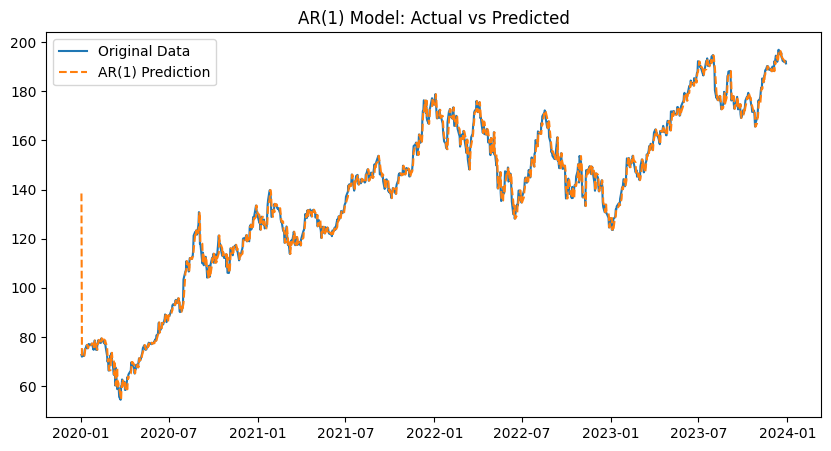

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1006
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2392.048
Date:                Mon, 24 Feb 2025   AIC                           4790.097
Time:                        14:29:06   BIC                           4804.838
Sample:                             0   HQIC                          4795.698
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.4251     31.465      4.399      0.000      76.755     200.095
ar.L1          0.9983      0.002    420.657      0.000       0.994       1.003
sigma2         6.7666      0.223     30.369      0.0

In [5]:
# Prepare data for AR(1) model
close_prices = apple_data['Close']
model_ar1 = ARIMA(close_prices, order=(1, 0, 0))  # AR(1) model
result_ar1 = model_ar1.fit()

# Get predictions
apple_data['AR1_Pred'] = result_ar1.fittedvalues

# Plot the original and predicted values
plt.figure(figsize=(10,5))
plt.plot(apple_data['Close'], label="Original Data")
plt.plot(apple_data['AR1_Pred'], label="AR(1) Prediction", linestyle="dashed")
plt.legend()
plt.title("AR(1) Model: Actual vs Predicted")
plt.show()

# Print model summary
print(result_ar1.summary())


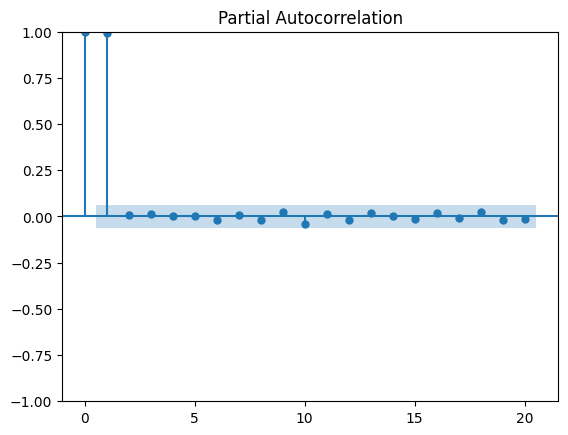

In [6]:
# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(close_prices, lags=20)
plt.show()


In [7]:
# Fit the optimal AR model (e.g., AR(2) as PACF suggests it)
model_ar_best = ARIMA(close_prices, order=(2, 0, 0))  # Change order if needed
result_ar_best = model_ar_best.fit()

# Compare AR(1) and AR(best)
print("AR(1) AIC:", result_ar1.aic)
print("AR(Best) AIC:", result_ar_best.aic)  # Lower AIC is better


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR(1) AIC: 4790.096660003909
AR(Best) AIC: 4790.645483938848


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


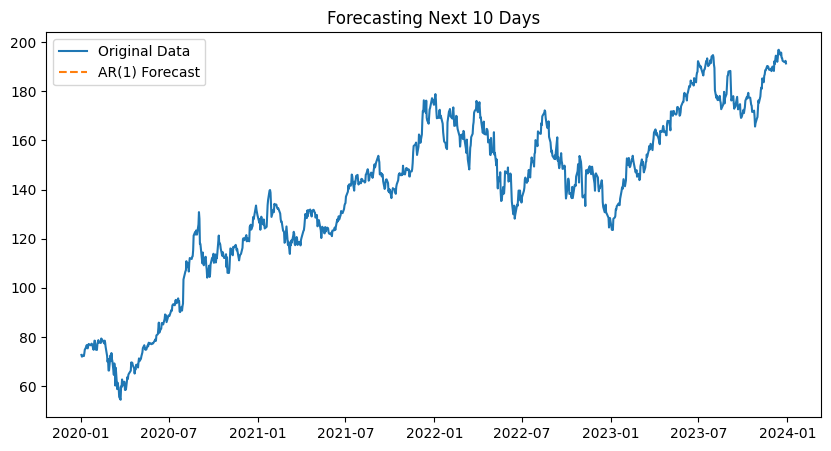

In [8]:
# Forecast next 10 days using AR(1)
forecast_ar1 = result_ar1.forecast(steps=10)


# Plot forecasts
plt.figure(figsize=(10,5))
plt.plot(close_prices, label="Original Data")
plt.plot(pd.Series(forecast_ar1, index=pd.date_range(start=close_prices.index[-1], periods=10, freq='D')), label="AR(1) Forecast", linestyle="dashed")
plt.legend()
plt.title("Forecasting Next 10 Days")
plt.show()


In [9]:
# Compute Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse_ar1 = mean_squared_error(close_prices[-10:], forecast_ar1)
rmse_ar1 = np.sqrt(mse_ar1)


print(f"AR(1) Model - MSE: {mse_ar1}, RMSE: {rmse_ar1}")


AR(1) Model - MSE: 8.323682227815786, RMSE: 2.8850792411675257
